# Exploratory Data Analysis for Restaurant Business Rankings 2020

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_hist = pd.read_csv('./data/HistoricalEsportData.csv',encoding='cp1252')
df_general = pd.read_csv('./data/GeneralEsportData.csv',encoding='cp1252')

## Features of historical e-sports earnings dataset
There are 5 features in the historical dataset of  e-sports earnings.
  * Date: Month
  * Game: Game name
  * Earnings: Prizepool in this month
  * Players: Amount of players receiving earnings in this month
  * Tournaments: Amount of tournaments in this month


In [ ]:
df_hist.head()

,Date,Game,Earnings,Players,Tournaments
0,1 01 1998,QuakeWorld,15000.0,8,1
1,1 05 1998,Quake II,14600.0,4,1
2,1 07 1998,Quake II,15000.0,5,1
3,1 07 1998,QuakeWorld,6500.0,4,1
4,1 11 1998,Quake II,36600.0,13,2


## Features of general e-sports earnings dataset
There are 7 features in the general dataset of  e-sports earnings.
  * Game: Game name
  * Release Date: Release year of the game
  * Genre: Genre category of game
  * TotalEarnings: Total prize pool allocated in tournaments
  * OnlineEarnings: Total prize pool allocated in online only tournaments
  * TotalPlayers: Total amount of players who received a prize
  * TotalTournaments: Total amount of tournaments in the site

In [ ]:
df_general.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,190262.81,156839.89,255,96
1,Age of Empires II,1999,Strategy,1815535.12,619037.87,1172,815
2,Age of Empires III,2005,Strategy,68113.85,41500.00,106,76
3,Age of Empires Online,2011,Strategy,3778.56,0.00,17,10
4,Age of Mythology,2002,Strategy,52360.00,52000.00,22,6


### Data Preprocessing
Get Genre for historical dataset by merging it with general dataset. Then splitting year and month from date.

In [ ]:
 df_histwithtype = pd.merge(df_hist, df_general[['Game','Genre']], how='left', left_on='Game', right_on='Game')

In [ ]:
df_histwithtype['Date'] = pd.to_datetime(df_histwithtype['Date'],format='%d %m %Y')
 
df_histwithtype['year'] = df_histwithtype['Date'].dt.year

df_histwithtype['month'] = df_histwithtype['Date'].dt.month

In [ ]:
df_histwithtype.to_csv('hist_withtype.csv')

,Date,Game,Earnings,Players,Tournaments,Genre,year,month
0,1998-01-01,QuakeWorld,15000.0,8,1,First-Person Shooter,1998,1
1,1998-05-01,Quake II,14600.0,4,1,First-Person Shooter,1998,5
2,1998-07-01,Quake II,15000.0,5,1,First-Person Shooter,1998,7
3,1998-07-01,QuakeWorld,6500.0,4,1,First-Person Shooter,1998,7
4,1998-11-01,Quake II,36600.0,13,2,First-Person Shooter,1998,11


We group the historical data by Game, year and month. Then we could view the monthly data for each game.

In [ ]:
monthly_dataset_bygame =  df_histwithtype.groupby(['Game','year','month']).sum()
print(monthly_dataset_bygame)

                      Earnings  Players  Tournaments
Game      year month                                
ARMS      2017 7        1135.0       13            3
               8          66.0        2            1
               10        261.0        3            2
               11        695.0        9            4
               12       1100.1        9            3
...                        ...      ...          ...
rFactor 2 2020 9        2047.5        3            1
               10       2065.0        3            1
               12      21315.0       27            2
          2021 1       12100.0       10            1
               3        1011.5        3            1

[6513 rows x 3 columns]


## Descriptive statistics of monthly data
* Earnings: The mean is \$146634.6 and median is \$9555.45
* Players: The mean is 52.45 and median is 15.00
* Tournaments: The mean is 6.66 and median is 2.00

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
monthly_dataset_bygame.describe()

,Earnings,Players,Tournaments
count,6513.00,6513.00,6513.00
mean,146634.60,52.45,6.66
std,946680.86,118.20,12.36
min,0.00,0.00,1.00
25%,1000.00,5.00,1.00
50%,9555.45,15.00,2.00
75%,56500.00,44.00,6.00
max,36713555.90,1699.00,172.00


## Descriptive statistics of general dataset
* TotalEarnings: The mean is \$ 1831070.00 and median is \$ 37952.83
* OnlineEarnings: The mean is \$ 1416295.56 and median is \$18687.15
* TotalPlayers: The mean is 191.69 and median is 20.00
* TotalTournments: The mean is 82.93 and median is 5.00

In [ ]:
df_general.drop('ReleaseDate',axis=1).describe()

,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
count,520.00,520.00,520.00,520.00
mean,1831070.00,1416295.56,191.69,82.93
std,13007304.70,10917266.14,815.97,422.41
min,0.00,0.00,0.00,0.00
25%,1375.20,0.00,4.00,1.00
50%,37952.83,18687.15,20.00,5.00
75%,208222.46,140722.50,90.25,23.25
max,231860237.22,214390391.34,13531.00,6066.00


## Summary of general e-sport earnings by Genre
* Most games are fighting games and first-pearson shooter.
* Only six games are role-playing games.
* Only eight games are third-person shooter.

In [ ]:
df_general['Genre'].value_counts()

Fighting Game                      164
First-Person Shooter               106
Sports                              68
Racing                              52
Strategy                            51
Multiplayer Online Battle Arena     21
Collectible Card Game               17
Puzzle Game                         14
Battle Royale                       13
Third-Person Shooter                 8
Role-Playing Game                    6
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Pie Chart of e-sports by game types')

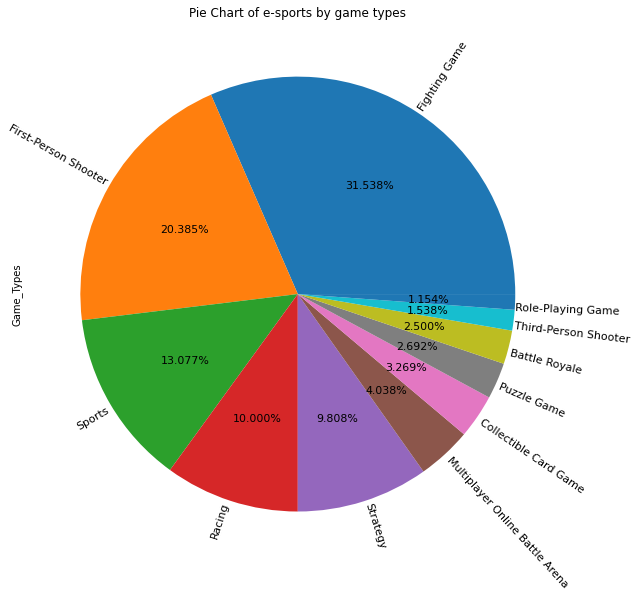

In [ ]:
fig = plt.figure(figsize =(20, 10))
df_general['Genre'].value_counts().plot.pie(label="Game_Types", autopct='%.3f%%', fontsize = 11,labeldistance=1,rotatelabels=20)
plt.title("Pie Chart of e-sports by game types")

##  Top 10 games by total prize pool allocated in tournaments

* Most games are multiplayer online  battle arena and first-person shooter
* There is only one sport game in top 10 highest total prize pool allocated in tournaments.

In [ ]:
df_general.sort_values('TotalEarnings',ascending=False).head(10)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
163,Dota 2,2013,Multiplayer Online Battle Arena,231860237.22,214390391.34,3999,1496
85,Counter-Strike: Global Offensive,2012,First-Person Shooter,112019077.11,75379935.79,13531,5532
502,Fortnite,2017,Battle Royale,102261009.13,42159597.59,4554,685
168,League of Legends,2009,Multiplayer Online Battle Arena,83048606.83,74989487.17,7385,2509
34,StarCraft II,2010,Strategy,34734474.78,29074484.73,2087,6066
506,PLAYERUNKNOWN’S BATTLEGROUNDS,2017,Battle Royale,32853449.92,27081978.40,2967,327
118,Overwatch,2016,First-Person Shooter,26750317.28,18227464.45,3532,747
473,Hearthstone,2014,Collectible Card Game,24564783.47,18482179.57,2460,914
157,Arena of Valor,2015,Multiplayer Online Battle Arena,24093832.78,22409531.67,681,62
166,Heroes of the Storm,2015,Multiplayer Online Battle Arena,18188482.65,14196415.95,1253,475


## Top 10 games by total prize pool allocated in online only tournaments

All top 10 games are the same in previous section. But some ranks are different. Top 2 games are still Dota 2 and CS which same as previous section.

In [ ]:
df_general.sort_values('OnlineEarnings',ascending=False).head(10)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
163,Dota 2,2013,Multiplayer Online Battle Arena,231860237.22,214390391.34,3999,1496
85,Counter-Strike: Global Offensive,2012,First-Person Shooter,112019077.11,75379935.79,13531,5532
168,League of Legends,2009,Multiplayer Online Battle Arena,83048606.83,74989487.17,7385,2509
502,Fortnite,2017,Battle Royale,102261009.13,42159597.59,4554,685
34,StarCraft II,2010,Strategy,34734474.78,29074484.73,2087,6066
506,PLAYERUNKNOWN’S BATTLEGROUNDS,2017,Battle Royale,32853449.92,27081978.40,2967,327
157,Arena of Valor,2015,Multiplayer Online Battle Arena,24093832.78,22409531.67,681,62
473,Hearthstone,2014,Collectible Card Game,24564783.47,18482179.57,2460,914
118,Overwatch,2016,First-Person Shooter,26750317.28,18227464.45,3532,747
166,Heroes of the Storm,2015,Multiplayer Online Battle Arena,18188482.65,14196415.95,1253,475


## Top 10 games by total amount of players who received a prize

CS, LOL and Fortnite are top 3 games. VALORANT is the only game that appeared in this ranking but did not appear in previous two rankings.

In [ ]:
df_general.sort_values('TotalPlayers',ascending=False).head(10)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
85,Counter-Strike: Global Offensive,2012,First-Person Shooter,112019077.11,75379935.79,13531,5532
168,League of Legends,2009,Multiplayer Online Battle Arena,83048606.83,74989487.17,7385,2509
502,Fortnite,2017,Battle Royale,102261009.13,42159597.59,4554,685
82,Counter-Strike,2000,First-Person Shooter,13529661.03,12816431.29,4141,997
163,Dota 2,2013,Multiplayer Online Battle Arena,231860237.22,214390391.34,3999,1496
118,Overwatch,2016,First-Person Shooter,26750317.28,18227464.45,3532,747
506,PLAYERUNKNOWN’S BATTLEGROUNDS,2017,Battle Royale,32853449.92,27081978.40,2967,327
473,Hearthstone,2014,Collectible Card Game,24564783.47,18482179.57,2460,914
151,VALORANT,2020,First-Person Shooter,2890044.69,211228.00,2247,317
34,StarCraft II,2010,Strategy,34734474.78,29074484.73,2087,6066


## COVID 19 Impact

### Earnings Distribution


In [ ]:
df_year = df_histwithtype.groupby(['year','month']).sum().reset_index()
df_year['Time']=pd.to_datetime(df_year['year'].astype(str) + '/' + df_year['month'].astype(str))
df_year

,year,month,Earnings,Players,Tournaments,Time
0,1998,1,15000.00,8,1,1998-01-01
1,1998,5,14600.00,4,1,1998-05-01
2,1998,7,21500.00,9,2,1998-07-01
3,1998,11,78600.00,21,4,1998-11-01
4,1998,12,2000.00,1,1,1998-12-01
...,...,...,...,...,...,...
261,2020,11,11258805.21,4143,341,2020-11-01
262,2020,12,11549728.82,3870,326,2020-12-01
263,2021,1,6030645.41,2114,199,2021-01-01
264,2021,2,4075896.39,1862,176,2021-02-01


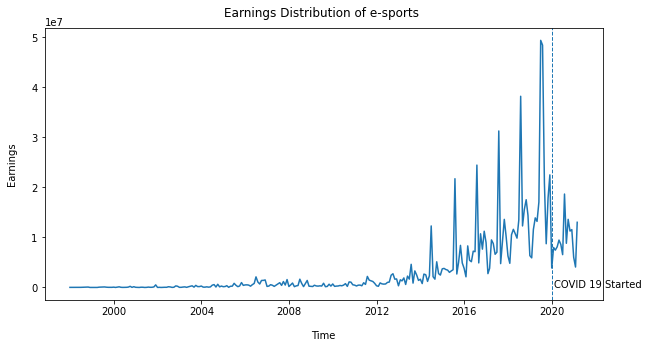

In [ ]:
fig= plt.figure(figsize=(10,5))
plt.plot(df_year['Time'],df_year['Earnings'])
plt.axvline(x=pd.to_datetime('2020-01-01'),linestyle='dashed', linewidth=1,label = "COVID 19 Started")
plt.text(pd.to_datetime('2020-02-01'), 5, "COVID 19 Started")
plt.xlabel("Time", labelpad=14)
plt.ylabel("Earnings", labelpad=14)
plt.title("Earnings Distribution of e-sports ", y=1.02);

### Tournaments Distribution

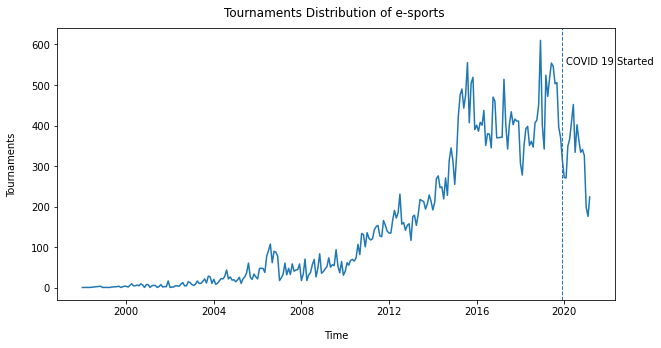

In [ ]:
fig= plt.figure(figsize=(10,5))
plt.plot(df_year['Time'],df_year['Tournaments'])
plt.axvline(x=pd.to_datetime('2020-01-01'),linestyle='dashed', linewidth=1,label = "COVID 19 Started")
plt.text(pd.to_datetime('2020-02-01'), 550, "COVID 19 Started")
plt.xlabel("Time", labelpad=14)
plt.ylabel("Tournaments", labelpad=14)
plt.title("Tournaments Distribution of e-sports ", y=1.02);

### Players Distribution

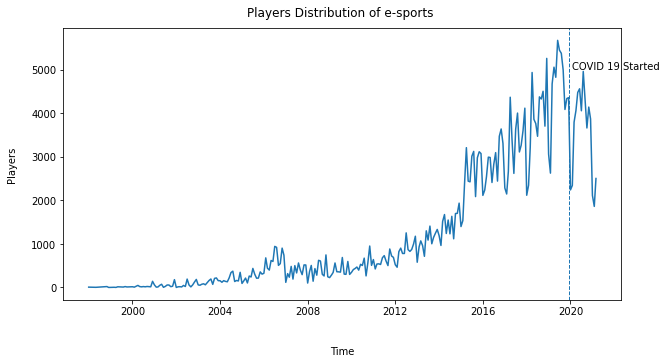

In [ ]:
fig= plt.figure(figsize=(10,5))
plt.plot(df_year['Time'],df_year['Players'])
plt.axvline(x=pd.to_datetime('2020-01-01'),linestyle='dashed', linewidth=1,label = "COVID 19 Started")
plt.text(pd.to_datetime('2020-02-01'), 5000, "COVID 19 Started")
plt.xlabel("Time", labelpad=30)
plt.ylabel("Players", labelpad=14)
plt.title("Players Distribution of e-sports ", y=1.02);

### Total players by game type
* To find which game types give many players prizes.


In [ ]:
df_pop = df_general.drop("ReleaseDate",axis=1).groupby(["Genre"]).sum().reindex()
df_pop

,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
Genre,,,,
Battle Royale,155661970.82,83457089.64,10824,1401
Collectible Card Game,36428030.22,28979083.64,4146,1561
Fighting Game,21092314.15,19425528.59,12927,9271
First-Person Shooter,244840668.11,177289175.06,38487,11831
Multiplayer Online Battle Arena,372308004.75,337313883.26,16004,5258
Puzzle Game,50327.66,33195.55,151,60
Racing,9313822.03,5469502.60,2899,1048
Role-Playing Game,6377952.83,5461744.43,750,206
Sports,30753107.15,20661523.90,3867,2506


### Top 10 game categories by total earnings

Multiplayer Online Battle Arena is the game category which offers biggest total prize pool in tournaments 

In [ ]:
df_pop.sort_values('TotalEarnings',ascending=False).head(10)

,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
Genre,,,,
Multiplayer Online Battle Arena,372308004.75,337313883.26,16004,5258
First-Person Shooter,244840668.11,177289175.06,38487,11831
Battle Royale,155661970.82,83457089.64,10824,1401
Strategy,69818217.51,54086215.12,9155,9883
Collectible Card Game,36428030.22,28979083.64,4146,1561
Sports,30753107.15,20661523.90,3867,2506
Fighting Game,21092314.15,19425528.59,12927,9271
Racing,9313822.03,5469502.60,2899,1048
Role-Playing Game,6377952.83,5461744.43,750,206


### Top 10 game categories by online earnings

Multiplayer Online Battle Arena is also the game category which offers biggest online prize pool in tournaments 

In [ ]:
df_pop.sort_values('OnlineEarnings',ascending=False).head(10)

,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
Genre,,,,
Multiplayer Online Battle Arena,372308004.75,337313883.26,16004,5258
First-Person Shooter,244840668.11,177289175.06,38487,11831
Battle Royale,155661970.82,83457089.64,10824,1401
Strategy,69818217.51,54086215.12,9155,9883
Collectible Card Game,36428030.22,28979083.64,4146,1561
Sports,30753107.15,20661523.90,3867,2506
Fighting Game,21092314.15,19425528.59,12927,9271
Racing,9313822.03,5469502.60,2899,1048
Role-Playing Game,6377952.83,5461744.43,750,206


### Top 10 game categories by total players
First-Person Shooter is the game category which gives most players prizes. 

In [ ]:
df_pop.sort_values('TotalPlayers',ascending=False).head(10)

,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
Genre,,,,
First-Person Shooter,244840668.11,177289175.06,38487,11831
Multiplayer Online Battle Arena,372308004.75,337313883.26,16004,5258
Fighting Game,21092314.15,19425528.59,12927,9271
Battle Royale,155661970.82,83457089.64,10824,1401
Strategy,69818217.51,54086215.12,9155,9883
Collectible Card Game,36428030.22,28979083.64,4146,1561
Sports,30753107.15,20661523.90,3867,2506
Racing,9313822.03,5469502.60,2899,1048
Role-Playing Game,6377952.83,5461744.43,750,206


### Top 10 game categories by total tournaments

First-Person Shooter is also the game category that hold most total amount of tournaments in the site.

In [ ]:
df_pop.sort_values('TotalTournaments',ascending=False).head(10)

,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
Genre,,,,
First-Person Shooter,244840668.11,177289175.06,38487,11831
Strategy,69818217.51,54086215.12,9155,9883
Fighting Game,21092314.15,19425528.59,12927,9271
Multiplayer Online Battle Arena,372308004.75,337313883.26,16004,5258
Sports,30753107.15,20661523.90,3867,2506
Collectible Card Game,36428030.22,28979083.64,4146,1561
Battle Royale,155661970.82,83457089.64,10824,1401
Racing,9313822.03,5469502.60,2899,1048
Role-Playing Game,6377952.83,5461744.43,750,206
